In [1]:
import pandas as pd
import copy
import numpy as np
from numpy.linalg import multi_dot
import networkx as nx
# from netwulf import visualize
import matplotlib.pyplot as plt
from typing import Union
from numpy import ones,transpose,dot
from math import factorial, exp,log, e
from random import random, randrange
from scipy.sparse import csr_matrix, csc_matrix, lil_matrix
from scipy.special import binom
from typing import Dict, List, Tuple


# create the graph 
G = nx.Graph()

# create the adjacency matrix 
A=to_adjacency_matrix(G)
adjacency_matrix=A.toarray()

In [3]:
# find the node's l block
def block_index(l,B):
    
    return list(B[:,l]).index(1)

# compute the number of links between all the blocks for a given partition 
def links_matrix(A,B):
                                                 
    return multi_dot([B,A,transpose(B)])         # number of links matrix  

# compute the possible number of links between blocks alpha and beta 
def tot_blocks(B,n):                
    
    return multi_dot([B,ones([n,n],int),transpose(B)])  
    
#compute the Hamiltonian function 
def Hamiltonian(r,l,n):
    
    h = 0
    for a in range(n):
        for b in range(a,n):
                      
            h += log(r[a,b] + 1) + log(binom(r[a,b],l[a,b]))
        
    return h

In [20]:
# sampling the similarity index with Metropolis algorithm 

def partitions_sampling(A,B,n):
    
    Hplot = []
    l_matrix = links_matrix(A,B)
    r_matrix = tot_blocks(B,n)
    H = Hamiltonian(r_matrix,l_matrix,n)
    Hplot.append(H)
    z=exp(-H)
    R = (l_matrix + 1) / (r_matrix + 2) * exp(-H)
    
    for p in range(partitions):
        
        B_new = B.copy()                  # define a new possible partition             
        l = randrange(n)                  # select a random node
        
        gamma = block_index(l,B)          # find the block of node l 
        B_new[gamma,l] = 0                # remove the node from the block 
        
        omega = randrange(n)              # select a random block   
        B_new[omega,l] = 1                # move the node to the block 
        
        l_matrix_new = links_matrix(A,B_new)
        r_matrix_new = tot_blocks(B_new,n)
        H_new = Hamiltonian(r_matrix_new,l_matrix_new,n)
        DH = H_new - H
        
        if random() < exp(-DH):                       # decide whether to accept the new partition
            
            Hplot.append(H_new)
#            B_list.append(B)                          
            H = H_new                                 # update the Hamiltonian
            z += exp(-H_new)                          # update the partition function  
          
            R += (l_matrix_new + 1) / (r_matrix_new + 2) * exp(-H)      # update the similarity index matrix 
            
            B = B_new.copy()                          # update the partitioning
            
    return(Hplot,B,R/z)


In [18]:
nodes=G.number_of_nodes()

# starting the block matrix 
block_matrix = np.zeros((nodes,nodes),dtype=int)

for i in range(nodes):
        
        alpha = randrange(nodes)
        block_matrix[alpha,i] = 1

In [21]:
partitions = 100000

energy,last_partition,similarity_index = partitions_sampling(adjacency_matrix,block_matrix,nodes)

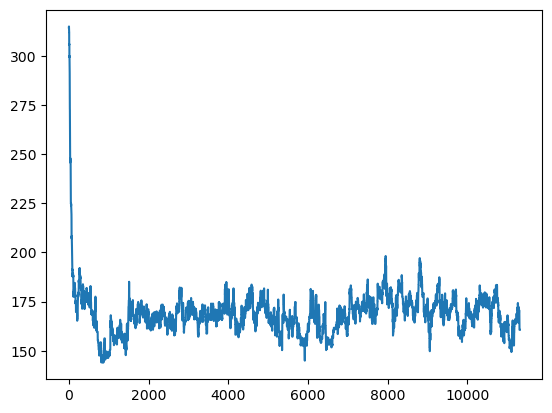

In [22]:
plt.plot(energy)

In [26]:
similarity_index

array([[0.48954553, 0.50000104, 0.48889614, ..., 0.47479114, 0.50000099,
        0.5       ],
       [0.50000104, 0.48277366, 0.4999989 , ..., 0.46268574, 0.49999899,
        0.50347322],
       [0.48889614, 0.4999989 , 0.59918282, ..., 0.15203141, 0.55009477,
        0.50265998],
       ...,
       [0.47479114, 0.46268574, 0.15203141, ..., 0.02313212, 0.32614649,
        0.48752567],
       [0.50000099, 0.49999899, 0.55009477, ..., 0.32614649, 0.46830324,
        0.49999989],
       [0.5       , 0.50347322, 0.50265998, ..., 0.48752567, 0.49999989,
        0.4948292 ]])